# PREPROCESSING: BINNING

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
df_tip = sns.load_dataset('tips')
df_tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Equal Frequency


In [13]:
# Equal Frequency

df_tip['total_bill_efreq'] = pd.qcut(df_tip['total_bill'], 5)
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_efreq
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]"


In [14]:
df_tip['total_bill_efreq_encode'] = pd.qcut(df_tip['total_bill'], 5, labels=range(1,6))
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_efreq,total_bill_efreq_encode
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4


In [21]:
# df_tip.groupby('total_bill_efreq').count()[['total_bill']]

In [20]:
efreq = df_tip.pivot_table(
    index='total_bill_efreq',
    aggfunc=len,
    values='total_bill'
)

efreq.columns = ['Frequency']
efreq

,Frequency
total_bill_efreq,
"(3.069, 12.636]",49
"(12.636, 16.222]",49
"(16.222, 19.818]",48
"(19.818, 26.098]",49
"(26.098, 50.81]",49


### Equal Interval

In [24]:
df_tip['total_bill_eint'] = pd.cut(df_tip['total_bill'], 5)
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_efreq,total_bill_efreq_encode,total_bill_eint
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]"


In [25]:
df_tip['total_bill_eint_encode'] = pd.cut(df_tip['total_bill'], 5, labels=range(1,6))
df_tip.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_efreq,total_bill_efreq_encode,total_bill_eint,total_bill_eint_encode
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]",3


In [26]:
eint = df_tip.pivot_table(
    index='total_bill_eint',
    aggfunc=len,
    values='total_bill'
)

eint.columns = ['Frequency']
eint

,Frequency
total_bill_eint,
"(3.022, 12.618]",49
"(12.618, 22.166]",119
"(22.166, 31.714]",50
"(31.714, 41.262]",19
"(41.262, 50.81]",7


### Binning with KBinsDiscretizer (sklearn)

In [27]:
from sklearn.preprocessing import KBinsDiscretizer

In [28]:
df_disk = pd.read_csv('disk.csv')
df_disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [29]:
df_disk['class'].value_counts()

1    793
0    736
Name: class, dtype: int64

In [31]:
df_disk['x_eint'] = pd.cut(df_disk['x'], 7)
df_disk['x_eint_encode'] = pd.cut(df_disk['x'], 7, labels=range(1,8))

df_disk.head()

,x,class,x_eint,x_eint_encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [35]:
# melihat proporsi class pada tiap interval
pd.crosstab(df_disk['x_eint'], df_disk['class'], normalize=0)

class,0,1
x_eint,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


<AxesSubplot:xlabel='x_eint'>

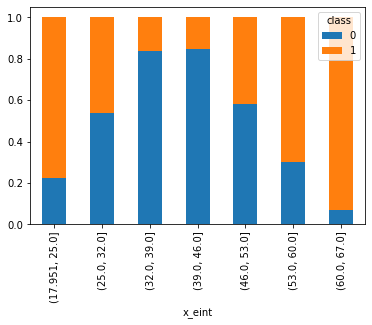

In [37]:
pd.crosstab(df_disk['x_eint'], df_disk['class'], normalize=0).plot(kind='bar', stacked=True)

# hubungan antara persentase resiko gagal bayar (class) dan usia (x) adalah non-linear

### Model (without binning)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# define feature and target
X = df_disk[['x']]
y = df_disk['class']

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020, test_size=0.2)

In [47]:
# define model
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)

0.5686274509803921

### Model (with binning)

In [48]:
from sklearn.preprocessing import KBinsDiscretizer 

In [56]:
# strategy='uniform' --> equal interval
# strategy='quantile' --> equal frequancy

# define discretizer
discretizer = KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform')

# fitting
discretizer.fit(X_train)

# transform
X_train_disc = discretizer.transform(X_train)
X_test_disc = discretizer.transform(X_test)

In [60]:
logreg = LogisticRegression()

logreg.fit(X_train_disc, y_train)

y_pred_disc = logreg.predict(X_test_disc)

accuracy_score(y_test, y_pred_disc)

0.7026143790849673

# PREPROCESSING: POLYNOMIAL FEATURES

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
df_wine = pd.read_csv('white_wine.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [68]:
df_wine['alcohol'].fillna(df_wine['alcohol'].mean(), inplace=True) 
# df_wine.info()

In [70]:
df_wine['label'] = np.where(df_wine['quality']>6, 1, 0)

In [72]:
# define x y 
X = df_wine[['density', 'alcohol']]
y = df_wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

### Model (without polynomial feature)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8653846153846154

### Model (with polynomial feature)

In [108]:
# define polynomial feature
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [109]:
poly.get_feature_names_out()

array(['density', 'alcohol', 'density^2', 'density alcohol', 'alcohol^2',
       'density^3', 'density^2 alcohol', 'density alcohol^2', 'alcohol^3'],
      dtype=object)

In [110]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out())

,density,alcohol,density^2,density alcohol,alcohol^2,density^3,density^2 alcohol,density alcohol^2,alcohol^3
0,0.9946,10.5,0.989229,10.44330,110.25,0.983887,10.386906,109.654650,1157.625
1,0.9949,9.0,0.989826,8.95410,81.00,0.984778,8.908434,80.586900,729.000
2,1.0029,9.0,1.005808,9.02610,81.00,1.008725,9.052276,81.234900,729.000
3,0.9962,9.1,0.992414,9.06542,82.81,0.988643,9.030971,82.495322,753.571
4,0.9946,10.4,0.989229,10.34384,108.16,0.983887,10.287983,107.575936,1124.864
...,...,...,...,...,...,...,...,...,...
411,0.9969,9.2,0.993810,9.17148,84.64,0.990729,9.143048,84.377616,778.688
412,0.9954,10.4,0.990821,10.35216,108.16,0.986263,10.304540,107.662464,1124.864
413,0.9962,8.9,0.992414,8.86618,79.21,0.988643,8.832489,78.909002,704.969
414,0.9968,12.5,0.993610,12.46000,156.25,0.990431,12.420128,155.750000,1953.125


In [111]:
logreg = LogisticRegression()

logreg.fit(X_train_poly, y_train)

y_pred_poly = logreg.predict(X_test_poly)

accuracy_score(y_test, y_pred_poly)

0.9807692307692307

# Exercise: Preprocessing

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

**An individual’s annual income results from various factors. 
Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.**
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
- These are the demographics and other 
<br>
features to describe a person

<br>
drop columns: 'fnlwgt', 'education'

We will explore the possibility in predicting income level based on the individual’s personal information.

**Preprocess scheme:**
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

**Model:**
Decision Tree


In [123]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [122]:
# df.info()

In [121]:
# df[['education', 'education.num']].drop_duplicates().sort_values('education.num')

In [115]:
# df.isna().sum()